## INSTALLATION

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.current_device()

0

In [ ]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [ ]:
!pip install pandas

^C


In [ ]:
!pip install pillow

In [ ]:
!pip install pdf2image

In [ ]:
!pip install poppler-utils

^C


In [ ]:
!pip install PyMuPDF

^C


In [ ]:
!pip install matplotlib

^C


In [ ]:
!pip install opencv-pthon

ERROR: Could not find a version that satisfies the requirement opencv-pthon (from versions: none)
ERROR: No matching distribution found for opencv-pthon


In [ ]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install ocrmypdf

In [ ]:
!pip install invoice2data

^C


In [ ]:
!pip install easyocr --user


^C


In [ ]:
!pip install scikit-image

## IMPORTS

In [ ]:
import json
from PIL import Image, ImageDraw
import pandas as pd
import os
import numpy as np
from pdf2image import convert_from_path
import fitz  # PyMuPDF
import glob
import matplotlib.pyplot as plt
import pytesseract
import cv2

from skimage import io
from skimage.transform import rotate as sk_rotate


import pytesseract
from pytesseract import Output
from PIL import Image, ImageDraw, ImageFont

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# pip install --upgrade pymupdf ===> fitz

# Data Processing

### Load data and files

In [ ]:
data_csv_path = 'C:/Users/makni/Downloads/ieee/data/data.csv'
data = pd.read_csv(data_csv_path)

input_folder = "C:/Users/makni/Downloads/ieee/data"
output_folder = "C:/Users/makni/Downloads/ieee/image"
image_folder_path = 'C:/Users/makni/Downloads/ieee/image'

json_output_folder = "C:/Users/makni/Downloads/ieee/json"
json2_output_folder = "C:/Users/makni/Downloads/ieee/json_without_nan"
json3_output_folder='C:/Users/makni/Downloads/ieee/preprocessed_annotations'

image_preprocessed='C:/Users/makni/Downloads/ieee/preprocessed_images'


## Data understanding & transformation

In [ ]:
file_count = len([name for name in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, name))])
print(f"There are {file_count} files in the folder '{input_folder}'.")

There are 197 files in the folder 'C:/Users/makni/Downloads/ieee/data'.


## convert to png nd visualize example

In [ ]:
def convert_pdf_to_png(pdf_path, output_folder):
    doc = fitz.open(pdf_path)

    for i in range(len(doc)):
        page = doc[i]
        pix = page.get_pixmap()
        image_path = os.path.join(output_folder, f"{os.path.basename(pdf_path)}_{i+1}.png")
        pix.save(image_path)
    doc.close()

def convert_pdf_images_to_png(input_folder, output_folder):
    pdf_files = glob.glob(os.path.join(input_folder, "*.pdf"))

    for pdf_file in pdf_files:
        convert_pdf_to_png(pdf_file, output_folder)

convert_pdf_images_to_png(input_folder, output_folder)

In [ ]:
def denormalize_bbox(bbox, image_width, image_height):
    x_min, y_min, width, height = bbox
    return [
    int(x_min * image_width),
    int(y_min * image_height),
    int((x_min + width) * image_width),
    int((y_min + height) * image_height),
    ]

def display_annotated_image(image_folder_path, bbox_data_path, file_name):
    bbox_data = pd.read_csv(bbox_data_path)
    row = bbox_data[bbox_data['filename'] == file_name].iloc[0]
    image_filename = f"{os. path.splitext(file_name)[0]}.pdf_1.png"
    image_path = os.path.join(image_folder_path, image_filename)

    with Image.open(image_path) as img:
        draw = ImageDraw.Draw(img)
        width, height = img.size

    for col in ['title_bbx', 'date_bbx', 'stamp_bbx', 'signature_bbx', 'ieee_bbx', 'total_bbx', 'totalValue_bbx']:
        if pd.notnull(row[col]):
            bbox_normalized = eval(row[col])
            bbox = denormalize_bbox(bbox_normalized, width, height)
            label = col.replace('_bbx', '')
            draw.rectangle(bbox, outline='red', width=2)
            draw. text((bbox[0], bbox[1]), label, fill='blue')
    return(img)

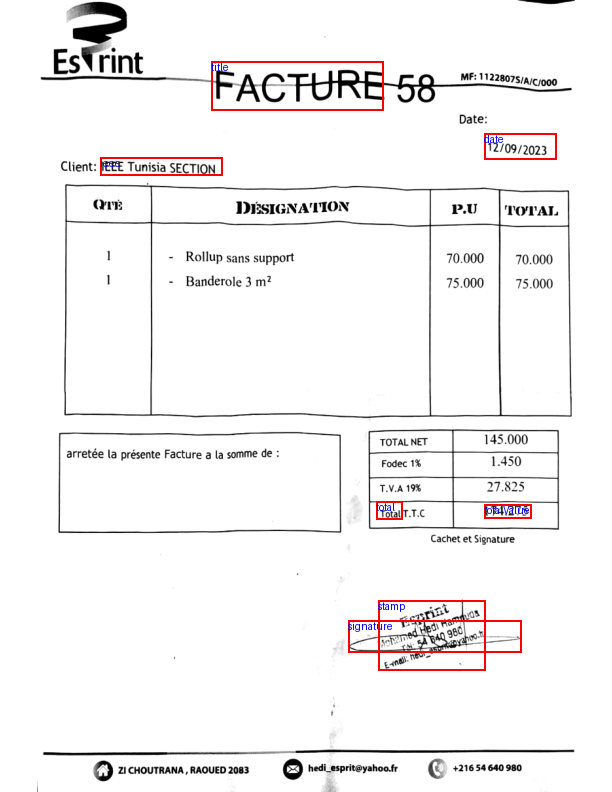

In [ ]:
file_name = 'ARISS-Facture.pdf'# '20231217_190133_merged-1.pdf' #'factures cs 2023-1.pdf'
img= display_annotated_image(image_folder_path, data_csv_path, file_name)
img

In [ ]:
file_count = len([name for name in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, name))])
print(f"There are {file_count} files in the folder '{output_folder}'.")


There are 196 files in the folder 'C:/Users/makni/Downloads/ieee/image'.


## Convert to JSON files (Stamp Data)

In [ ]:
all_data = []

for filename in os.listdir(output_folder):
    if filename.endswith("_1.png"):
        base_filename = filename.replace('_1.png', '')
        row = data[data['filename'] == base_filename]

        if not row.empty:
            row = row.iloc[0]
            dt = {"filename": filename}
            for col in ['title_bbx', 'date_bbx', 'stamp_bbx', 'signature_bbx', 'ieee_bbx', 'total_bbx', 'totalValue_bbx']:
                if not pd.isnull(row[col]) and row[col] != '':
                    dt[col] = row[col]

            all_data.append(dt)

os.makedirs(json_output_folder, exist_ok=True)

json_filename = os.path.join(json_output_folder, 'all_data.json')
with open(json_filename, 'w') as json_file:
    json.dump(all_data, json_file)

print("All data has been written to a single JSON file.")



In [ ]:

all_data = []

for filename in os.listdir(output_folder):
    if filename.endswith("_1.png"):
        base_filename = filename.replace('_1.png', '')
        row = data[data['filename'] == base_filename]

        if not row.empty:
            row = row.iloc[0]
            dt = {
                "filenamex": filename,
                "title_bb": row["title_bbx"] if pd.notnull(row["title_bbx"]) else None,
                "date_bbx": row["date_bbx"] if pd.notnull(row["date_bbx"]) else None,
                "stamp_bbx": row["stamp_bbx"] if pd.notnull(row["stamp_bbx"]) else None,
                "signature_bbx": row["signature_bbx"] if pd.notnull(row["signature_bbx"]) else None,
                "ieee_bbx": row["ieee_bbx"] if pd.notnull(row["ieee_bbx"]) else None,
                "total_bbx": row["total_bbx"] if pd.notnull(row["total_bbx"]) else None,
                "totalValue_bbx": row["totalValue_bbx"] if pd.notnull(row["totalValue_bbx"]) else None,
            }

            all_data.append(dt)

json_output_path = os.path.join(json2_output_folder, json_output_filename)
with open(json_output_path, 'w') as json_file:
    json.dump(all_data, json_file)

print(f"All data has been written to {json_output_path}.")


In [ ]:
os.makedirs(json_output_folder, exist_ok=True)

for filename in os.listdir(output_folder):
    if filename.endswith("_1.png"):
        base_filename = filename.replace('_1.png', '')
        row = data[data['filename'] == base_filename]

        if not row.empty:
            # Extracting bounding box information and constructing the JSON structure
            dt = {
                "filename": filename,
                "title_bbx": row["title_bbx"].values[0],
                "date_bbx": row["date_bbx"].values[0],
                "stamp_bbx": row["stamp_bbx"].values[0],
                "signature_bbx": row["signature_bbx"].values[0],
                "ieee_bbx": row["ieee_bbx"].values[0],
                "total_bbx": row["total_bbx"].values[0],
                "totalValue_bbx": row["totalValue_bbx"].values[0],
            }

            # Writing the JSON file
            json_filename = os.path.join(json_output_folder, base_filename + '.json')
            with open(json_filename, 'w') as json_file:
                json.dump(dt, json_file)

print("JSON files have been created.")


In [ ]:
file_count = len([name for name in os.listdir(json_output_folder) if os.path.isfile(os.path.join(json_output_folder, name))])
print(f"There are {file_count} files in the folder '{json_output_folder}'.")


There are 197 files in the folder 'C:/Users/makni/Downloads/ieee/json'.


In [ ]:

os.makedirs(json2_output_folder, exist_ok=True)


def is_not_empty(value):
    return not pd.isnull(value) and value != ''

for filename in os.listdir(output_folder):
    if filename.endswith("_1.png"):
        base_filename = filename.replace('_1.png', '')
        row = data[data['filename'] == base_filename].iloc[0]

        dt = {"filename": filename}
        columns = ['title_bbx', 'date_bbx', 'stamp_bbx', 'signature_bbx', 'ieee_bbx', 'total_bbx', 'totalValue_bbx']

        for col in columns:
            if is_not_empty(row[col]):
                dt[col] = row[col]

        json_filename = os.path.join(json2_output_folder, base_filename + '.json')
        with open(json_filename, 'w') as json_file:
            json.dump(dt, json_file)

print("JSON files have been created.")


In [ ]:
file_count = len([name for name in os.listdir(json2_output_folder) if os.path.isfile(os.path.join(json2_output_folder, name))])
print(f"There are {file_count} files in the folder '{json2_output_folder}'.")


There are 197 files in the folder 'C:/Users/makni/Downloads/ieee/json_without_nan'.


### non existing files

In [ ]:
image_files = set(os.listdir(image_folder_path))

expected_filenames = set(data['filename'].apply(lambda x: f"{x}_1.png"))

csv_not_in_folder = expected_filenames - image_files
folder_not_in_csv = image_files - expected_filenames

print("Files listed in CSV but not found in the folder:\n", csv_not_in_folder)
print('\n')
print("Files in the folder but not listed in CSV:\n", folder_not_in_csv)


Files listed in CSV but not found in the folder:
 {'2022-09-14--2022-10-12_R??sum??_Facture.pdf_1.png', 'ilovepdf_merged-4(1).pdf_1.png', 'ilovepdf_merged-3(1).pdf_1.png', 'ilovepdf_merged-2(1).pdf_1.png', 'IEEE fAC N??84.pdf_1.png'}


Files in the folder but not listed in CSV:
 {'.ipynb_checkpoints'}


### empty fields

In [ ]:
empty_fields = data.isnull().sum()
print("Empty fields in each column:")
print(empty_fields)

missing_percentage = (empty_fields / len(data)) * 100
print("\nPercentage of missing data per column:")
print(missing_percentage)


Empty fields in each column:
filename           0
title_bbx         26
date_bbx           9
stamp_bbx         52
signature_bbx     65
ieee_bbx          26
total_bbx         12
totalValue_bbx    13
title             27
handwritten        0
dtype: int64

Percentage of missing data per column:
filename           0.000000
title_bbx         12.935323
date_bbx           4.477612
stamp_bbx         25.870647
signature_bbx     32.338308
ieee_bbx          12.935323
total_bbx          5.970149
totalValue_bbx     6.467662
title             13.432836
handwritten        0.000000
dtype: float64


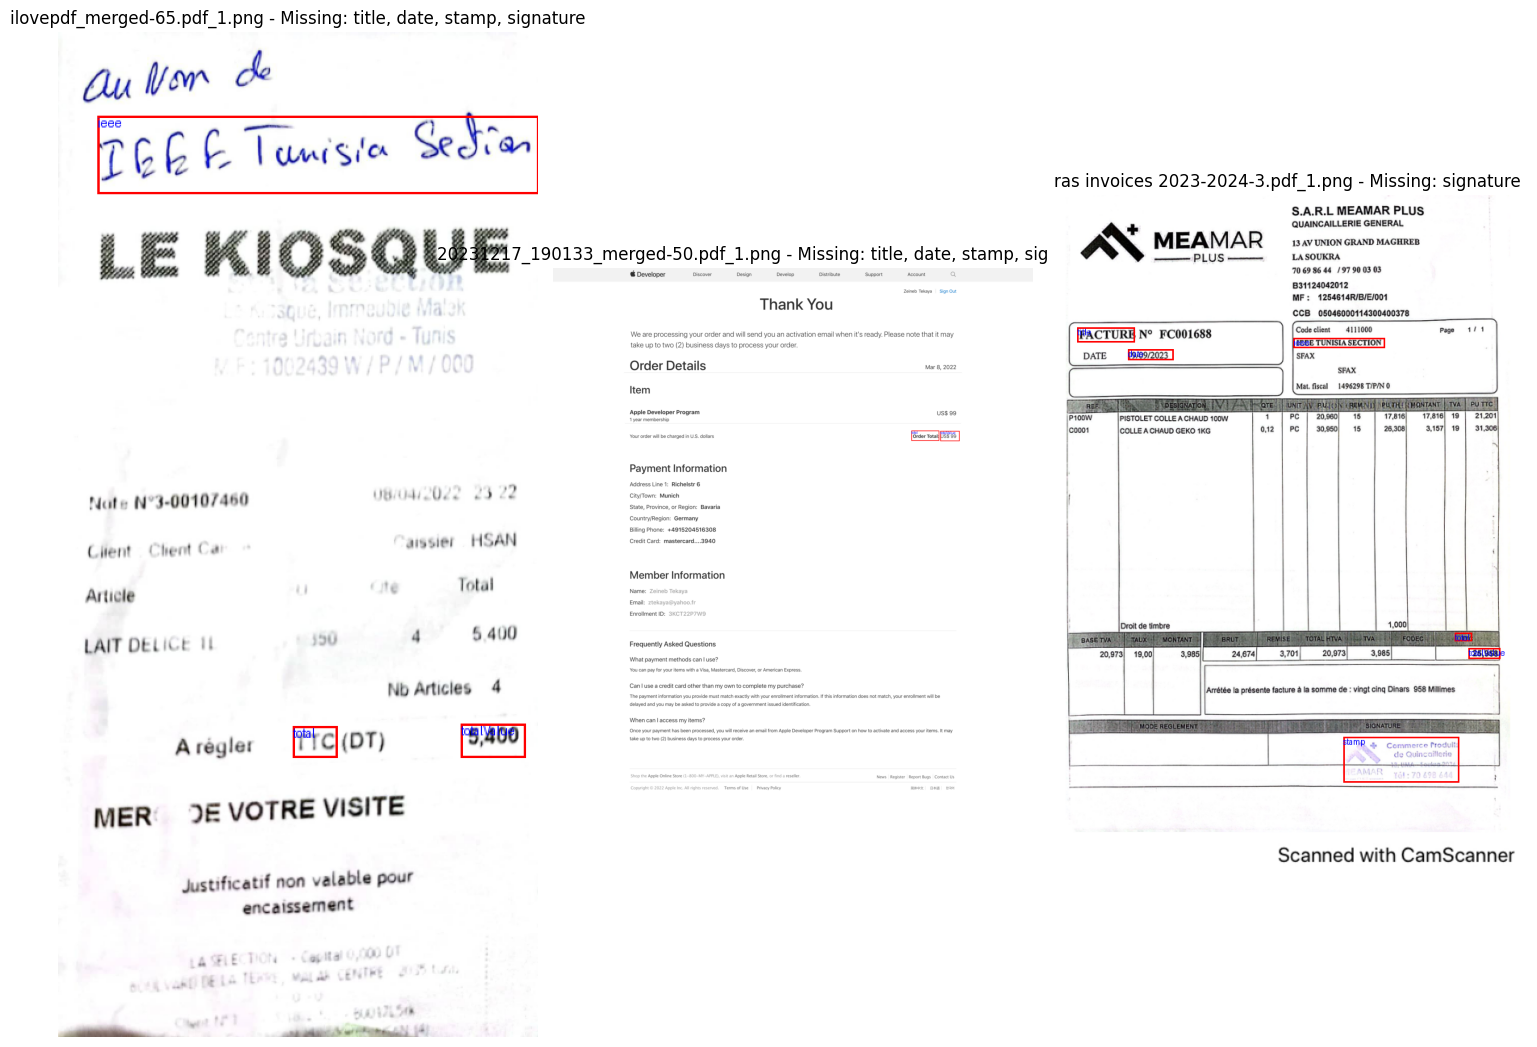

In [ ]:
bbox_columns = [
    'title_bbx', 'date_bbx', 'stamp_bbx',
    'signature_bbx', 'ieee_bbx', 'total_bbx', 'totalValue_bbx'
]

image_files = ['ilovepdf_merged-65.pdf_1.png', '20231217_190133_merged-50.pdf_1.png', 'ras invoices 2023-2024-3.pdf_1.png']
n_images = len(image_files)

fig, axs = plt.subplots(1, n_images, figsize=(15, n_images * 5))

for idx, file_name in enumerate(image_files):
    row = data[data['filename'].str.contains(file_name.replace('_1.png', ''), na=False)]

    missing_criteria = [col.replace('_bbx', '') for col in bbox_columns if pd.isnull(row[col].values[0])]
    title = f"{file_name} - Missing: {', '.join(missing_criteria)}"

    img = display_annotated_image(image_folder_path, data_csv_path, file_name.replace('_1.png', ''))

    axs[idx].set_title(title)
    axs[idx].imshow(img)
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


# Direct Pytesseract Results

## pytesseract ocr

In [ ]:
img = cv2.imread("C:/Users/makni/Downloads/ieee/image/WRO-1.pdf_1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
text = pytesseract.image_to_string(threshold_img)
print(text)



fes1 zepa7 84000

FACTURE 6

Bae

13/99/2022
UISIA 38
are DéSIGNATION pu [TOTAL
SB Toni A caion Co eS
' = Paeleroe 3ni? 73.000 | 75.000
4 - rso0 | 141.900
1 :

as.on0 | 45,000

auretoe ts tonne Free La samme de

1 anges. 227 nllamss —
re wo
Tore LT

2ICHOUTRATIA, RAQUED 2083 hed esprina yahoos sre sean sao




In [ ]:

def ocr_to_json(image_path):
    img = Image.open(image_path)
    data = pytesseract.image_to_data(img, output_type=Output.DICT)
    json_data = []
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 60:
            word_data = {
                'word': data['text'][i],
                'bounding_box': {
                    'left': data['left'][i],
                    'top': data['top'][i],
                    'width': data['width'][i],
                    'height': data['height'][i]
                },
                'confidence': data['conf'][i]
            }
            json_data.append(word_data)

    return json_data

image_path = 'C:/Users/makni/Downloads/ieee/image/20231217_190133_merged-13.pdf_1.png'
ocr_results = ocr_to_json(image_path)
for word_data in ocr_results:
    print(word_data)


{'word': 'Tout', 'bounding_box': {'left': 74, 'top': 50, 'width': 51, 'height': 18}, 'confidence': 96}
{'word': ' ', 'bounding_box': {'left': 129, 'top': 51, 'width': 32, 'height': 13}, 'confidence': 95}
{'word': 'UREAU', 'bounding_box': {'left': 72, 'top': 77, 'width': 95, 'height': 21}, 'confidence': 91}
{'word': ' ', 'bounding_box': {'left': 18, 'top': 141, 'width': 521, 'height': 3}, 'confidence': 95}
{'word': ' ', 'bounding_box': {'left': 285, 'top': 161, 'width': 12, 'height': 76}, 'confidence': 95}
{'word': ' ', 'bounding_box': {'left': 20, 'top': 261, 'width': 522, 'height': 3}, 'confidence': 95}
{'word': ' ', 'bounding_box': {'left': 15, 'top': 275, 'width': 533, 'height': 4}, 'confidence': 95}
{'word': ' ', 'bounding_box': {'left': 84, 'top': 263, 'width': 3, 'height': 264}, 'confidence': 95}
{'word': '   ', 'bounding_box': {'left': 297, 'top': 299, 'width': 72, 'height': 228}, 'confidence': 95}
{'word': ' ', 'bounding_box': {'left': 454, 'top': 264, 'width': 4, 'height': 264

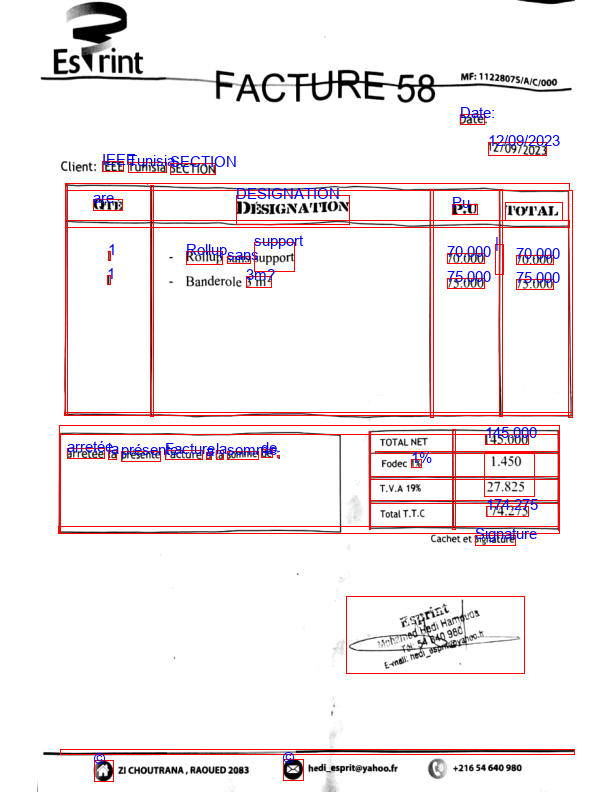

In [ ]:


def ocr_and_visualize(image_path):
    image = Image.open(image_path)
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype("arial.ttf", 15)
    except IOError:
        font = ImageFont.load_default()
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 60:
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            word = data['text'][i]
            draw.rectangle([x, y, x + w, y + h], outline='red')
            draw.text((x, y - 10), word, fill='blue', font=font)

    return(image)

img = ocr_and_visualize('C:/Users/makni/Downloads/ieee/image/ARISS-Facture.pdf_1.png')
img

# Data Preprocessing for better ocr results


## utils

### Functions

In [ ]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
def determine_skew_angle(image, delta=1, limit=5):
    _, bw = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    edges = cv2.Canny(bw, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

    angles = []
    for rho, theta in lines[:, 0]:
        angle = (theta - np.pi/2) * 180/np.pi
        if abs(angle) <= limit:
            angles.append(angle)

    angle = np.mean(angles)
    return angle

def rotate_image(image, angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [ ]:
from PIL import Image

def adjust_dpi_and_resize(image_path, output_path, desired_dpi=300, target_width=None, target_height=None):
    image = Image.open(image_path)
    scaling_factor = desired_dpi / 96
    new_size = (int(image.width * scaling_factor), int(image.height * scaling_factor))
    image_resized = image.resize(new_size, Image.Resampling.LANCZOS)
    if target_width and target_height:
        image_resized = image_resized.resize((target_width, target_height), Image.Resampling.LANCZOS)
    image_resized.save(output_path, dpi=(desired_dpi, desired_dpi))
    return output_path

img_path = "C:/Users/makni/Downloads/ilovepdf_merged-1.pdf_1.png"
out_path = 'C:/Users/makni/Downloads/ssed.png'
adjusted_image_path = adjust_dpi_and_resize(img_path, out_path, 300, 1024, 768)


In [ ]:
def fix_illumination(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    corrected_image = clahe.apply(image)
    cv2.imwrite('corrected_illumination.png', corrected_image)
    return corrected_image
fixed_illumination_img = fix_illumination('C:/Users/makni/Downloads/files (31).pdf_1.png')
cv2.imwrite('illuminattttte.png', fixed_illumination_img)


True

### issue

In [ ]:
def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	return rect

def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	return warped

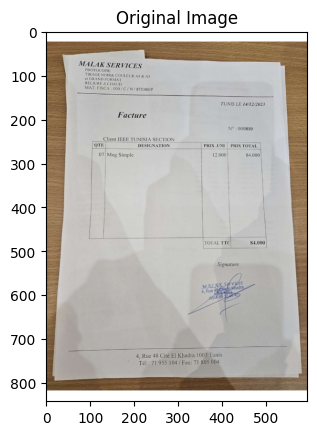

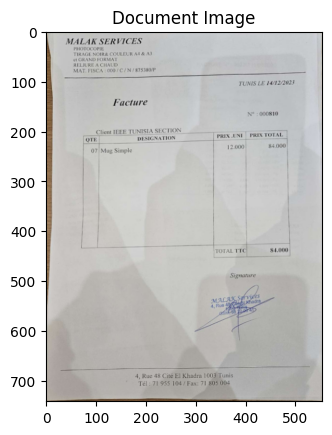

In [ ]:
image_path="C:/Users/makni/Downloads/20231217_190133_merged-3.pdf_1.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(gray, 75, 200)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        docCnt = approx
        break

paper = four_point_transform(image, docCnt.reshape(4, 2))

warped = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
warped = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

plt.imshow(cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))
plt.title('Document Image')
plt.show()


## final image preprocessing

In [ ]:

image_file = "C:/Users/makni/Downloads/ieee/image/ARISS-Facture.pdf_1.png"
with open("C:/Users/makni/Downloads/ieee/json_without_nan/ARISS-Facture.pdf.json", 'r') as f:
    annotation_data = json.load(f)
img = cv2.imread(image_file)

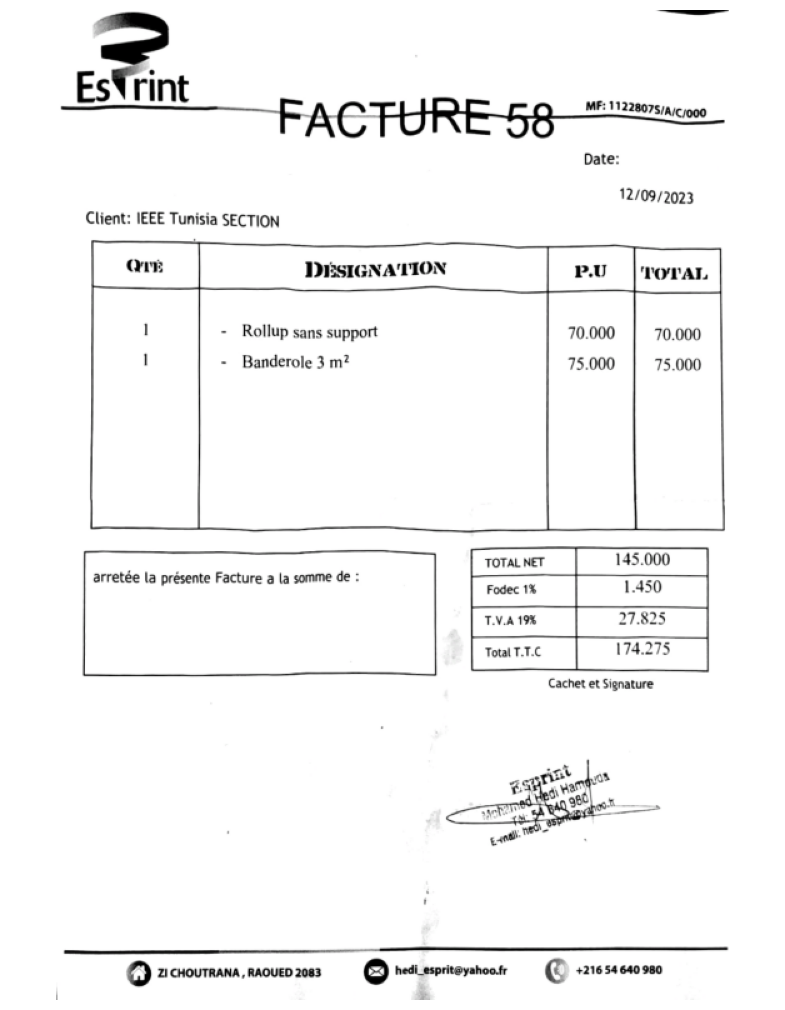

In [ ]:
display(image_file)

### test

In [ ]:

def preprocess_images(image_path, output_path="outtttttt.jpg", desired_dpi=300, target_width=1024, target_height=768):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_image = clahe.apply(gray_image)
    gray_image = cv2.fastNlMeansDenoising(gray_image, None, h=15, templateWindowSize=7, searchWindowSize=19)
    angle = determine_skew_angle(gray_image)
    if angle != 0:
        gray_image = rotate_image(gray_image, angle)
    image_pil = Image.fromarray(gray_image)
    scaling_factor = desired_dpi / 96
    new_size = (int(image_pil.width * scaling_factor), int(image_pil.height * scaling_factor))
    image_resized = image_pil.resize(new_size, Image.Resampling.LANCZOS)

    if target_width and target_height:
        image_resized = image_resized.resize((target_width, target_height), Image.Resampling.LANCZOS)
    image_resized.save(output_path, dpi=(desired_dpi, desired_dpi))
    return image_resized

output_path = "outtttttt.jpg"
preprocessed_image = preprocess_images(image_file, output_path, 300, 1024, 768)


In [ ]:
print("hdhi san3etna")
ocr_text_nlm1 = pytesseract.image_to_string(preprocessed_image, lang='eng')
print(ocr_text_nlm1)


print("hdha l oriiiiginal")
image = cv2.imread(image_file)
ocr_text_nlm = pytesseract.image_to_string(image, lang='eng')
print(ocr_text_nlm)

hdhi san3etna
EsTrint ae
FAC —

Date:
12/09/2023
Client: IEEE Tunisia SECTION
are DESIGNATION Pu | wowarn
1 - Rollup sans support 70.000 70.000
1 - Banderole 3 m? 75.000 75.000
TOTAL NET 145.000
arretée ta présente Facture a ta somme de = wl 1430
TVA ISS 27.825
Totat T.7.c 174.275

Cachet et Signature


hdha l oriiiiginal
Es¥rint

Date:
12/09/2023
Client: IEEE Tunisia SECTION
are DESIGNATION Pu
1 = Rollup sans support 70.000 | 70.000

1 + Banderole 3m?

75.000 | 75.000

arretée la présente Facture a la somme de :

‘TOTALNET 145.000
Fodec 1%
TWAT
Tol TT. 174.275

Cachet et Signature

© zcrourmannsxouena08

© resteseritorahoate — H s216 540980



## final image with stamp preprocessing

### functions

In [ ]:
def update_bboxes_for_skew(bbox, angle, image_width, image_height):
    center = (image_width / 2, image_height / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)

    points = np.array([
        [bbox[0], bbox[1]],
        [bbox[2], bbox[1]],
        [bbox[2], bbox[3]],
        [bbox[0], bbox[3]]
    ])

    ones = np.ones(shape=(len(points), 1))
    points_ones = np.hstack([points, ones])

    transformed_points = rot_mat.dot(points_ones.T).T

    x_coords = transformed_points[:, 0]
    y_coords = transformed_points[:, 1]

    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    return [x_min, y_min, x_max, y_max]



def update_bboxes_for_resize(bbox, scale_x, scale_y):
    x_min, y_min, x_max, y_max = bbox
    x_min, x_max = x_min * scale_x, x_max * scale_x
    y_min, y_max = y_min * scale_y, y_max * scale_y

    return [x_min, y_min, x_max, y_max]



def display_annotated_image3(image, bboxes):
    draw = ImageDraw.Draw(image)

    for label, bbox in bboxes:
        bbox = [int(coordinate) for coordinate in bbox]
        draw.rectangle(bbox, outline='red', width=2)
        draw.text((bbox[0], bbox[1]), label, fill='blue')

    return image

def display_annotated_image2(image, bboxes):
    draw = ImageDraw.Draw(image)

    for label, bbox in bboxes:
        bbox = [int(coordinate) for coordinate in bbox]
        draw.rectangle(bbox, outline='red', width=2)
        draw.text((bbox[0], bbox[1]), label, fill='blue')

    return image


def denormalize_bbox(bbox, image_width, image_height):

    x_min, y_min, width, height = bbox
    return [
    int(x_min * image_width),
    int(y_min * image_height),
    int((x_min + width) * image_width),
    int((y_min + height) * image_height),
    ]

def determine_skew_angle(image, delta=1, limit=5):
    _, bw = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    edges = cv2.Canny(bw, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
    angles = []

    if lines is not None:
        for rho, theta in lines[:, 0]:
            angle = (theta - np.pi / 2) * 180 / np.pi
            if abs(angle) <= limit:
                angles.append(angle)

    if angles:
        angle = np.mean(angles)
    else:
        angle = 0
    return angle



def rotate_image(image, angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


def denormalize_bboxes(bboxes, image_width, image_height):
    denormalized_bboxes = []
    for label, bbx in bboxes:
        denormalized_bbox = denormalize_bbox(bbx, image_width, image_height)
        denormalized_bboxes.append((label,denormalized_bbox))

    return denormalized_bboxes


In [ ]:
from PIL import Image
import cv2
import numpy as np
import json

def preprocess_images(image_path, annotation_data, output_path="outtttttt.jpg", desired_dpi=300, target_width=1024, target_height=768):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_image = clahe.apply(gray_image)
    gray_image = cv2.fastNlMeansDenoising(gray_image, None, h=15, templateWindowSize=7, searchWindowSize=19)
    orig_height, orig_width = gray_image.shape[:2]
    bboxes = [(key.replace('_bbx', ''), denormalize_bbox(json.loads(value), orig_width, orig_height))
              for key, value in annotation_data.items() if key.endswith('_bbx')]

    angle = determine_skew_angle(gray_image)
    if angle != 0:
        gray_image = rotate_image(gray_image, angle)
        bboxes = [(label, update_bboxes_for_skew(bbx, angle, gray_image.shape[1], gray_image.shape[0])) for label, bbx in bboxes]

    image_pil = Image.fromarray(gray_image)
    scaling_factor = desired_dpi / 96
    new_size = (int(image_pil.width * scaling_factor), int(image_pil.height * scaling_factor))
    image_resized = image_pil.resize(new_size, Image.Resampling.LANCZOS)

    scale_x = new_size[0] / image_pil.width
    scale_y = new_size[1] / image_pil.height
    bboxes = [(label, update_bboxes_for_resize(bbx, scale_x, scale_y)) for label, bbx in bboxes]

    if target_width and target_height:
        image_resized = image_resized.resize((target_width, target_height), Image.Resampling.LANCZOS)
        scale_x_resize = target_width / new_size[0]
        scale_y_resize = target_height / new_size[1]
        bboxes = [(label, update_bboxes_for_resize(bbx, scale_x_resize, scale_y_resize)) for label, bbx in bboxes]

    return image_resized, bboxes


### test

In [ ]:
from PIL import Image, ImageDraw, ImageFont

def visualize_bboxes(image, bboxes, output_path="output_with_bboxes.jpg"):
    if image.mode != 'RGB':
        image = image.convert('RGB')

    draw = ImageDraw.Draw(image)

    for label, (x_min, y_min, x_max, y_max) in bboxes:
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)

        font = ImageFont.load_default()

        label_x = max(x_min - 1, 0)
        label_y = max(y_min - 10, 0)

        draw.text((label_x, label_y), label, fill="red", font=font)

    image.save(output_path)
    return image


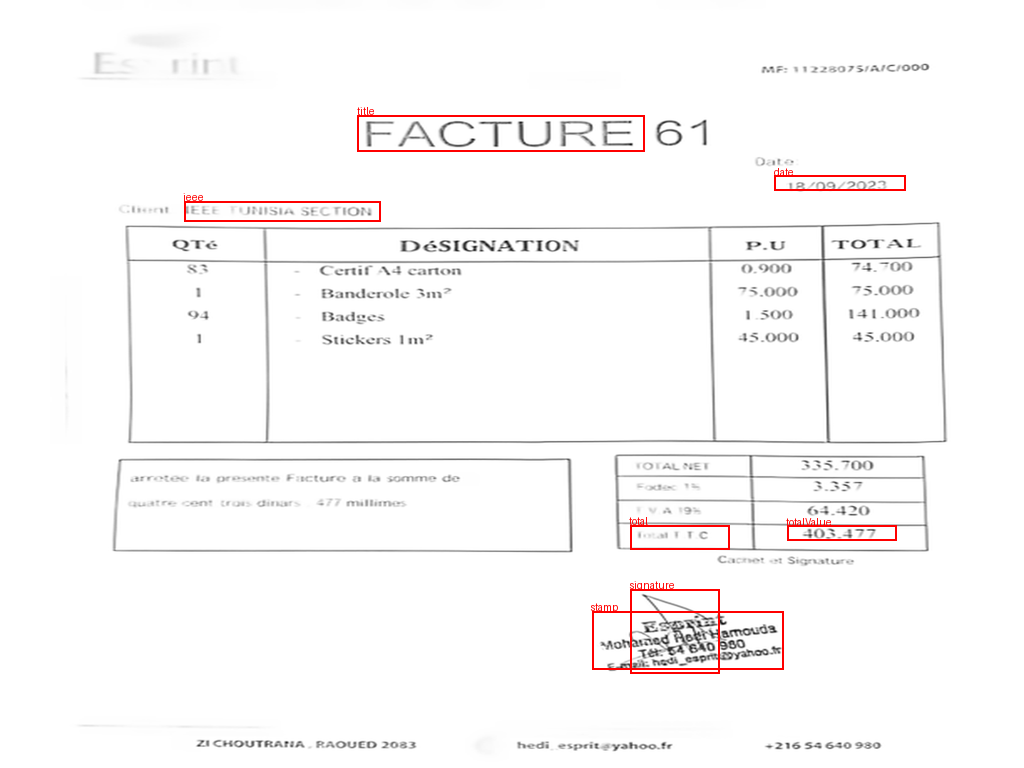

In [ ]:
with open("C:/Users/makni/Downloads/ieee/json_without_nan/WRO-1.pdf.json", 'r') as f:
    annotation_data = json.load(f)
image_file = "C:/Users/makni/Downloads/ieee/image/WRO-1.pdf_1.png"


processed_image, bboxes = preprocess_images(image_file, annotation_data)

visualize_bboxes(processed_image, bboxes)


# OCR & Transformation

### Extract Text

Word: FACTURE, Coordinates: (366, 120, 267, 27)
Word: 61, Coordinates: (656, 120, 51, 26)
Word:  , Coordinates: (761, 157, 37, 10)
Word: 18/09/2022, Coordinates: (789, 181, 97, 10)
Word:  , Coordinates: (126, 204, 811, 41)
Word:  , Coordinates: (130, 238, 808, 41)
Word:  , Coordinates: (433, 284, 22, 18)
Word:  , Coordinates: (355, 315, 30, 9)
Word:  , Coordinates: (406, 334, 27, 10)
Word:  , Coordinates: (131, 419, 815, 44)
Word:  , Coordinates: (118, 446, 451, 25)
Word:  , Coordinates: (616, 447, 306, 18)
Word:  , Coordinates: (798, 456, 80, 18)
Word:  , Coordinates: (618, 467, 305, 19)
Word:  , Coordinates: (133, 501, 29, 6)
Word:  , Coordinates: (810, 477, 56, 18)
Word:  , Coordinates: (619, 491, 305, 19)
Word:  , Coordinates: (657, 503, 54, 40)
Word:  , Coordinates: (620, 515, 304, 18)
Word: IEEE, Coordinates: (186, 206, 29, 8)
Word: SECTION, Coordinates: (303, 207, 68, 9)
Word: ate, Coordinates: (172, 240, 45, 11)
Word: pu, Coordinates: (746, 241, 39, 9)
Word: |, Coordinates: (81

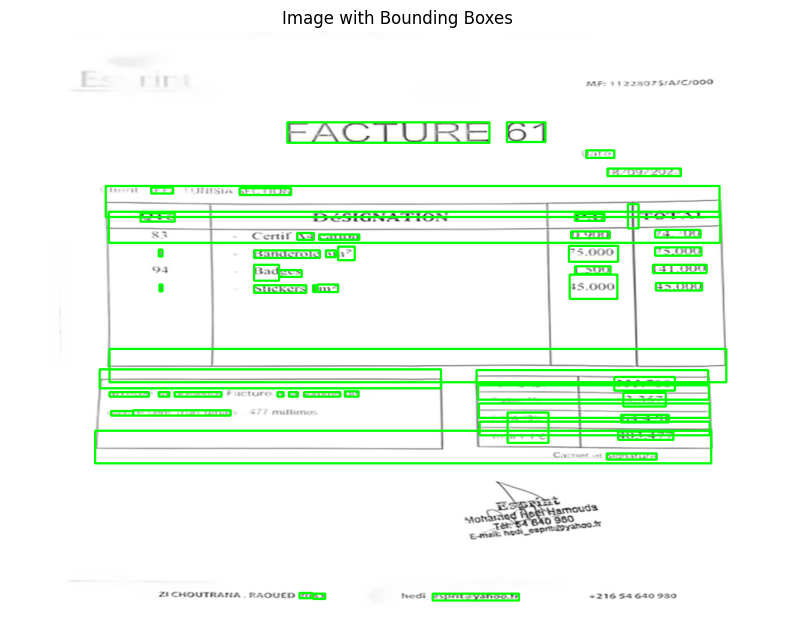

In [ ]:
preprocessed_image,_ = preprocess_images(image_file,annotation_data)
data = pytesseract.image_to_data(preprocessed_image,output_type=Output.DICT)

preprocessed_image = np.array(preprocessed_image)
preprocessed_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_GRAY2BGR)
n_boxes = len(data['level'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 50:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        word = data['text'][i]
        cv2.rectangle(preprocessed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(f"Word: {word}, Coordinates: {(x, y, w, h)}")

plt.figure(figsize=(10, 10))
plt.imshow(preprocessed_image)
plt.title('Image with Bounding Boxes')
plt.axis('off')
plt.show()


### Merge

In [ ]:
label2id = {
    'title': 1,
    'date': 2,
    'stamp': 3,
    'signature': 4,
    'ieee': 5,
    'total': 6,
    'totalValue': 7,
    'other': 0
}


id2label = {
    0: 'other',
    1: 'title',
    2: 'date',
    3: 'stamp',
    4: 'signature',
    5:'ieee',
    6:'total',
    7:'totalValue',
}

In [ ]:
from shapely.geometry import Polygon

def calculate_iou(box1, box2):
    polygon1 = Polygon([(box1[0], box1[1]), (box1[2], box1[1]), (box1[2], box1[3]), (box1[0], box1[3])])
    polygon2 = Polygon([(box2[0], box2[1]), (box2[2], box2[1]), (box2[2], box2[3]), (box2[0], box2[3])])

    intersection_area = polygon1.intersection(polygon2).area
    union_area = polygon1.union(polygon2).area

    iou = intersection_area / union_area
    return iou

def do_boxes_intersect(box1, box2):
    if box1[2] < box2[0] or box1[0] > box2[2] or box1[3] < box2[1] or box1[1] > box2[3]:
        return False
    return True

def is_box_inside(box1, box2):
    if box2[0] <= box1[0] <= box1[2] <= box2[2] and box2[1] <= box1[1] <= box1[3] <= box2[3]:
        return True
    if box1[0] <= box2[0] <= box2[2] <= box1[2] and box1[1] <= box2[1] <= box2[3] <= box1[3]:
        return True
    return False



In [ ]:
def check_overlap(ocr_bbox, labeled_bboxes):
    ocr_x1, ocr_y1, ocr_w, ocr_h = ocr_bbox
    ocr_x2, ocr_y2 = ocr_x1 + ocr_w, ocr_y1 + ocr_h

    for label, (x1, y1, x2, y2) in labeled_bboxes:
        if not (ocr_x1 > x2 or ocr_x2 < x1 or ocr_y1 > y2 or ocr_y2 < y1):
            return label

    return 'other'

def merge_annotations(data, labeled_bboxes):
    merged_data = []

    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 50:
            ocr_bbox = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            label = check_overlap(ocr_bbox, labeled_bboxes)
            merged_data.append({
                'text': data['text'][i],
                'bbox': ocr_bbox,
                'label': label
            })

    return merged_data

def create_json_annotation(file_name, merged_data):
    annotations = {
        'file_name': file_name,
        'annotations': merged_data
    }

    return annotations


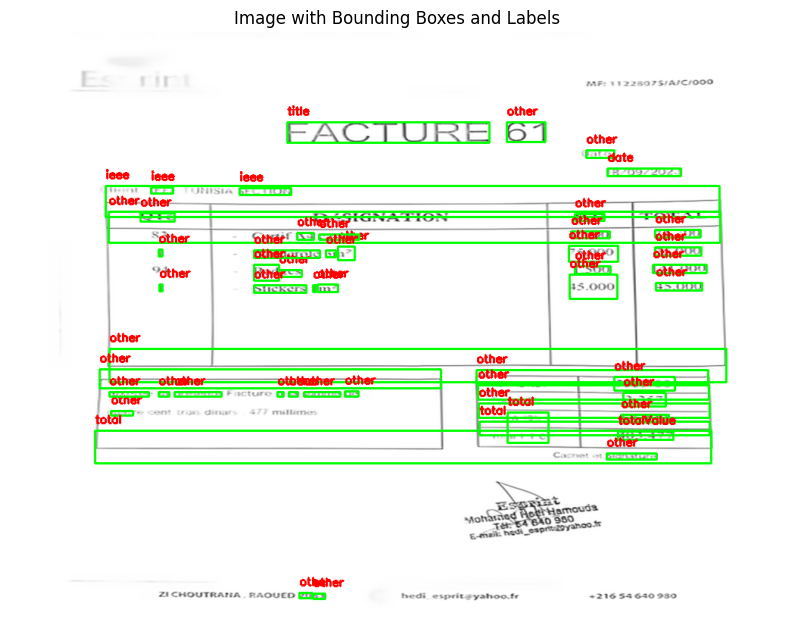

[('title', [357.8055197862207, 115.07250858848064, 644.1790562431089, 151.64304285238373]), ('date', [774.8692887559275, 175.53153365438772, 905.4827051940014, 190.39253749265893]), ('stamp', [592.2809086431962, 611.2252155737083, 783.4433421575748, 669.8678996016138]), ('signature', [630.6036181711138, 589.076170379512, 719.8901296946493, 673.6535697562493]), ('ieee', [184.40849205719297, 201.0445449193498, 380.3181417950204, 221.88151789058804]), ('total', [630.1427217226446, 525.0524450206666, 729.035398165434, 549.5334386698673]), ('totalValue', [787.429380913097, 525.6174207542844, 896.2913528102979, 540.4258119297912])]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[{'text': 'FACTURE', 'bbox': (366, 120, 267, 27), 'label': 'title'}, {'text': '61', 'bbox': (656, 120, 51, 26), 'label': 'other'}, {'text': ' ', 'bbox': (761, 157, 37, 10), 'label': 'other'}, {'text': '18/09/2022', 'bbox': (789, 181, 97, 10), 

In [ ]:
preprocessed_image, preprocessed_bboxes = preprocess_images(image_file, annotation_data)

preprocessed_image_for_ocr = np.array(preprocessed_image)
preprocessed_image_for_ocr = cv2.cvtColor(preprocessed_image_for_ocr, cv2.COLOR_GRAY2BGR)

data = pytesseract.image_to_data(preprocessed_image_for_ocr, output_type=Output.DICT)

ocr_results_with_labels = []

for i in range(len(data['level'])):
    if int(data['conf'][i]) > 55:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        word = data['text'][i]

        ocr_bbox = (x, y, w, h)
        label = check_overlap(ocr_bbox, preprocessed_bboxes)
        ocr_results_with_labels.append({'text': word, 'bbox': ocr_bbox, 'label': label})

        cv2.rectangle(preprocessed_image_for_ocr, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(preprocessed_image_for_ocr, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(preprocessed_image_for_ocr, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Boxes and Labels')
plt.axis('off')
plt.show()

print(preprocessed_bboxes)
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(ocr_results_with_labels)

In [ ]:
original_labels = set(label for label, _ in preprocessed_bboxes)
detected_labels = set(item['label'] for item in ocr_results_with_labels)
for label, bbox in preprocessed_bboxes:
    if label not in detected_labels:
        ocr_results_with_labels.append({'text': label, 'bbox': bbox, 'label': label})

print (ocr_results_with_labels)

[{'text': 'FACTURE', 'bbox': (366, 120, 267, 27), 'label': 'title'}, {'text': '61', 'bbox': (656, 120, 51, 26), 'label': 'other'}, {'text': ' ', 'bbox': (761, 157, 37, 10), 'label': 'other'}, {'text': '18/09/2022', 'bbox': (789, 181, 97, 10), 'label': 'date'}, {'text': ' ', 'bbox': (126, 204, 811, 41), 'label': 'ieee'}, {'text': ' ', 'bbox': (130, 238, 808, 41), 'label': 'other'}, {'text': ' ', 'bbox': (433, 284, 22, 18), 'label': 'other'}, {'text': ' ', 'bbox': (355, 315, 30, 9), 'label': 'other'}, {'text': ' ', 'bbox': (406, 334, 27, 10), 'label': 'other'}, {'text': ' ', 'bbox': (131, 419, 815, 44), 'label': 'other'}, {'text': ' ', 'bbox': (118, 446, 451, 25), 'label': 'other'}, {'text': ' ', 'bbox': (616, 447, 306, 18), 'label': 'other'}, {'text': ' ', 'bbox': (798, 456, 80, 18), 'label': 'other'}, {'text': ' ', 'bbox': (618, 467, 305, 19), 'label': 'other'}, {'text': ' ', 'bbox': (133, 501, 29, 6), 'label': 'other'}, {'text': ' ', 'bbox': (810, 477, 56, 18), 'label': 'other'}, {'te

In [ ]:
from collections import defaultdict

label_groups = defaultdict(list)
for item in ocr_results_with_labels:
    label_groups[item['label']].append(item)

merged_results = []
for label, items in label_groups.items():
    if label == 'ieee':
        if len(items) > 1:
            combined_text = " ".join([item['text'] for item in items])

            x_coords = [item['bbox'][0] for item in items]
            y_coords = [item['bbox'][1] for item in items]
            x_maxs = [item['bbox'][0] + item['bbox'][2] for item in items]
            y_maxs = [item['bbox'][1] + item['bbox'][3] for item in items]

            x_min = min(x_coords)
            y_min = min(y_coords)
            x_max = max(x_maxs)
            y_max = max(y_maxs)

            merged_bbox = (x_min, y_min, x_max - x_min, y_max - y_min)
            merged_results.append({'text': combined_text, 'bbox': merged_bbox, 'label': label})
        else:
            merged_results.extend(items)
    else:
        merged_results.extend(items)



# for label, items in label_groups.items():
#     if label == '0' or label == 'other':
#         for item in items:
#             merged_results.append(item)
#         continue

#     if len(items) > 1:  # Only merge if there are more than one item
#         combined_text = " ".join([item['text'] for item in items])

#         x_min = min(item['bbox'][0] for item in items)
#         y_min = min(item['bbox'][1] for item in items)
#         x_max = max(item['bbox'][0] + item['bbox'][2] for item in items)  # x + width
#         y_max = max(item['bbox'][1] + item['bbox'][3] for item in items)  # y + height

#         merged_bbox = (x_min, y_min, x_max, y_max)

#         merged_results.append({'text': combined_text, 'bbox': merged_bbox, 'label': label})
#     else:
#         merged_results.append(items[0])

print(merged_results)


[{'text': 'FACTURE', 'bbox': (366, 120, 267, 27), 'label': 'title'}, {'text': '61', 'bbox': (656, 120, 51, 26), 'label': 'other'}, {'text': ' ', 'bbox': (761, 157, 37, 10), 'label': 'other'}, {'text': ' ', 'bbox': (130, 238, 808, 41), 'label': 'other'}, {'text': ' ', 'bbox': (433, 284, 22, 18), 'label': 'other'}, {'text': ' ', 'bbox': (355, 315, 30, 9), 'label': 'other'}, {'text': ' ', 'bbox': (406, 334, 27, 10), 'label': 'other'}, {'text': ' ', 'bbox': (131, 419, 815, 44), 'label': 'other'}, {'text': ' ', 'bbox': (118, 446, 451, 25), 'label': 'other'}, {'text': ' ', 'bbox': (616, 447, 306, 18), 'label': 'other'}, {'text': ' ', 'bbox': (798, 456, 80, 18), 'label': 'other'}, {'text': ' ', 'bbox': (618, 467, 305, 19), 'label': 'other'}, {'text': ' ', 'bbox': (133, 501, 29, 6), 'label': 'other'}, {'text': ' ', 'bbox': (810, 477, 56, 18), 'label': 'other'}, {'text': ' ', 'bbox': (619, 491, 305, 19), 'label': 'other'}, {'text': 'ate', 'bbox': (172, 240, 45, 11), 'label': 'other'}, {'text': 

In [ ]:
def visualize_bboxes(image, annotations, output_path="output_with_bboxes.jpg"):

    if image.mode != 'RGB':
        image = image.convert('RGB')

    draw = ImageDraw.Draw(image)

    for annotation in annotations:
        bbox = annotation['bbox']
        label = annotation['label']
        x_min, y_min, width, height = bbox
        x_max, y_max = x_min + width, y_min + height

        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)

        font = ImageFont.load_default()

        draw.text((x_min, y_min - 10), label, fill="red", font=font)

    image.save(output_path)
    return image


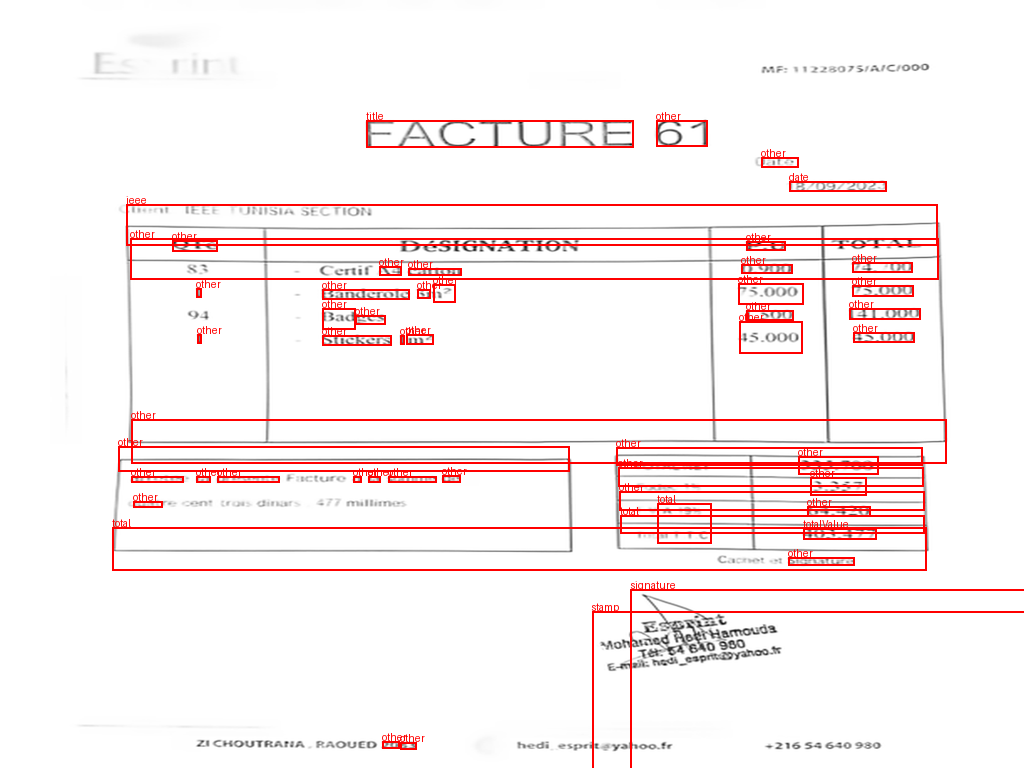

In [ ]:
visualize_bboxes(preprocessed_image, merged_results)

In [ ]:
formatted_result = {
    "path": image_file,
    "ner_tags": [],
    "words": [],
    "bboxes": []
}

for item in ocr_results_with_labels:
    words = item['text'].split()
    for word in words:
        if word:
            formatted_result["ner_tags"].append(label2id[item['label']])
            formatted_result["words"].append(word)
            formatted_result["bboxes"].append(list(item['bbox']))

print(formatted_result)

{'path': 'C:/Users/makni/Downloads/ieee/image/WRO-1.pdf_1.png', 'ner_tags': [1, 0, 2, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 3, 4], 'words': ['FACTURE', '61', '18/09/2022', 'IEEE', 'SECTION', 'ate', 'pu', 'A4', 'canon', '0.900', '74.700', '1', 'Banderole', '3n', '75.000', '73.000', 'Bad:', '1.500', '141.000', '1', 'Stickers', '1', '45.000', '45.000', 'arrotec', 'ta', 'presente', '@', 'ts', 'somme', 'do', '63.420', '303.477', 'Signature', '20:', 'stamp', 'signature'], 'bboxes': [[366, 120, 267, 27], [656, 120, 51, 26], [789, 181, 97, 10], [186, 206, 29, 8], [303, 207, 68, 9], [172, 240, 45, 11], [746, 241, 39, 9], [379, 266, 22, 9], [408, 268, 53, 7], [741, 264, 51, 9], [852, 262, 60, 10], [196, 288, 5, 9], [322, 289, 87, 10], [417, 289, 13, 9], [738, 283, 65, 21], [852, 285, 61, 11], [322, 308, 33, 21], [746, 310, 47, 10], [849, 308, 71, 11], [197, 334, 4, 9], [322, 335, 69, 10], [400, 335, 4, 9], [739, 321, 63, 32], [853, 332, 6

### final function

In [ ]:
import os
import json
from PIL import Image
import cv2
import numpy as np
from collections import defaultdict
import pytesseract
from pytesseract import Output

def read_annotation_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def save_new_annotation(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file)

def process_all_images(image_folder, annotation_folder, image_output_folder, annotation_output_folder):

    for image_file in os.listdir(image_folder):
        if image_file.endswith(".png"):
            base_name = image_file.replace('_1.png', '')
            annotation_file = f"{base_name}.json"
            annotation_path = os.path.join(annotation_folder, annotation_file)
            image_path = os.path.join(image_folder, image_file)

            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as f:
                    annotation_data = json.load(f)
                processed_image, formatted_result = preprocess_and_ocr(image_path, annotation_data)
                new_annotation_path = os.path.join(annotation_output_folder, f"{base_name}.json")
                save_new_annotation(formatted_result, new_annotation_path)

                new_image_path = os.path.join(image_output_folder, image_file)
                processed_image_np = np.array(processed_image)
                cv2.imwrite(new_image_path, processed_image_np)




In [ ]:
def resize_bbox(bbox, scale_factor):
    x, y, w, h = bbox
    center_x = x + w / 2
    center_y = y + h / 2

    new_w = w * scale_factor
    new_h = h * scale_factor

    new_x = center_x - new_w / 2
    new_y = center_y - new_h / 2

    return (int(new_x), int(new_y), int(new_w), int(new_h))

In [ ]:
def preprocess_and_ocr(image_path, annotation_data):
    preprocessed_image, preprocessed_bboxes = preprocess_images(image_path, annotation_data)
    ahah= preprocessed_bboxes
    preprocessed_image = np.array(preprocessed_image)

    data = pytesseract.image_to_data(preprocessed_image, output_type=Output.DICT)
    preprocessed_image_for_ocr = cv2.cvtColor(preprocessed_image, cv2.COLOR_GRAY2BGR)
    ocr_results_with_labels = []

    for i in range(len(data['level'])):
        if int(data['conf'][i]) > 55:
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            word = data['text'][i]

            ocr_bbox = (x, y, w, h)
            label = check_overlap(ocr_bbox, preprocessed_bboxes)
            ocr_results_with_labels.append({'text': word, 'bbox': ocr_bbox, 'label': label})

            cv2.rectangle(preprocessed_image_for_ocr, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(preprocessed_image_for_ocr, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    original_labels = set(label for label, _ in ahah)
    detected_labels = set(item['label'] for item in ocr_results_with_labels)

    scale_factor = 0.5

    for label, bbox in ahah:
        if label not in detected_labels:
            resized_bbox = resize_bbox(bbox, scale_factor)
            ocr_results_with_labels.append({'text': label, 'bbox': resized_bbox, 'label': label})

    formatted_result = {
        "path": image_path,
        "ner_tags": [],
        "words": [],
        "bboxes": []
    }

    for item in ocr_results_with_labels:
        text = item['text']
        formatted_result["ner_tags"].append(label2id.get(item['label'], 'O'))  # Map the label to an ID
        formatted_result["words"].append(text)
        formatted_result["bboxes"].append(list(item['bbox']))

    return preprocessed_image, formatted_result


{'path': 'C:/Users/makni/Downloads/ieee/image/WRO-1.pdf_1.png', 'ner_tags': [1, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 0, 0, 0, 3, 4], 'words': ['FACTURE', '61', ' ', '18/09/2022', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'IEEE', 'SECTION', 'ate', 'pu', 'A4', 'canon', '0.900', '74.700', '1', 'Banderole', '3n', '75.000', '73.000', 'Bad:', '1.500', '141.000', '1', 'Stickers', '1', '45.000', '45.000', 'arrotec', 'ta', 'presente', '@', 'ts', 'somme', 'do', '63.420', '303.477', ' ', 'Signature', '20:', ' ', 'stamp', 'signature'], 'bboxes': [[366, 120, 267, 27], [656, 120, 51, 26], [761, 157, 37, 10], [789, 181, 97, 10], [126, 204, 811, 41], [130, 238, 808, 41], [433, 284, 22, 18], [355, 315, 30, 9], [406, 334, 27, 10], [131, 419, 815, 44], [118, 446, 451, 25], [616, 447, 306, 18], [798, 456, 80, 18], [618, 467, 305, 19], [133, 501, 29, 6], [810, 477, 

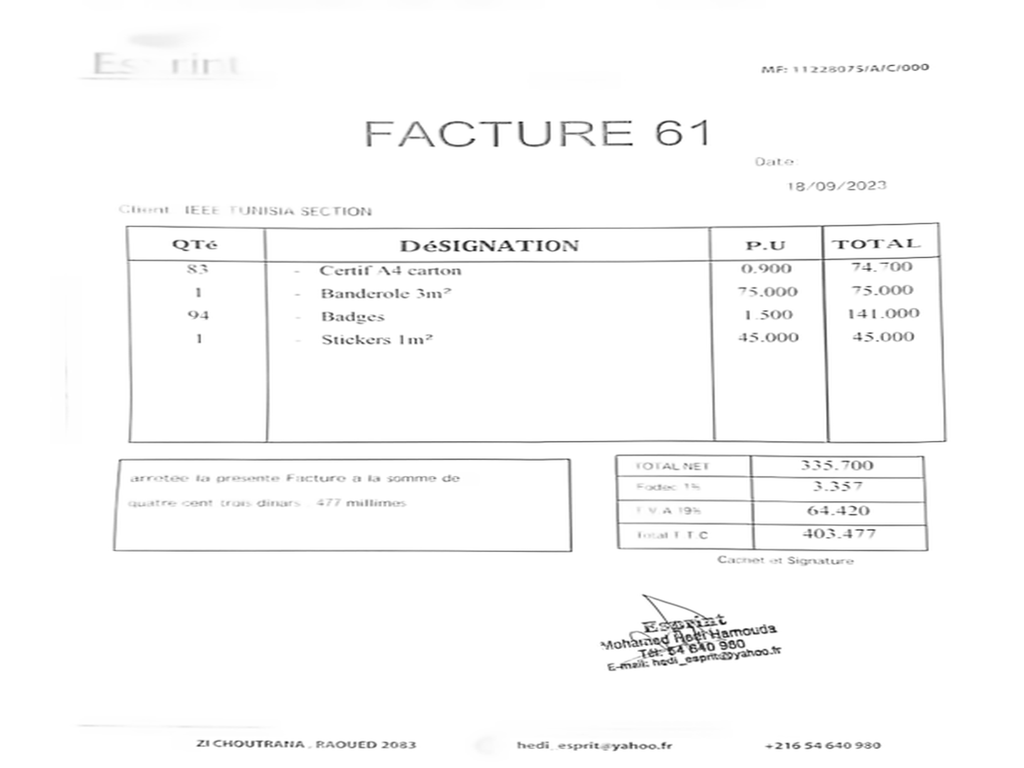

In [ ]:
image_file = "C:/Users/makni/Downloads/ieee/image/WRO-1.pdf_1.png"
with open("C:/Users/makni/Downloads/ieee/json_without_nan/WRO-1.pdf.json", 'r') as f:
    annotation_data = json.load(f)

preprocessed_image_for_ocr, result=  preprocess_and_ocr(image_file, annotation_data)
print(result)
preprocessed_image_for_ocr=Image.fromarray(preprocessed_image_for_ocr)

preprocessed_image_for_ocr

In [ ]:
# image_folder= "C:/Users/makni/Downloads/ieee/image"
# annotation_folder= "C:/Users/makni/Downloads/ieee/json_without_nan"
# annotation_output_folder='C:/Users/makni/Downloads/ieee/preprocessed_annotations'
# image_output_folder='C:/Users/makni/Downloads/ieee/preprocessed_images'
# process_all_images(image_folder, annotation_folder, image_output_folder, annotation_output_folder)

In [ ]:
file_count = len([name for name in os.listdir(json3_output_folder) if os.path.isfile(os.path.join(json3_output_folder, name))])
print(f"There are {file_count} files in the folder '{json3_output_folder}'.")

There are 196 files in the folder 'C:/Users/makni/Downloads/ieee/preprocessed_annotations'.
